#                                              PROJECT "X"

In [78]:
import pandas as pd
from sklearn.utils import shuffle
import pprint

###### reading dataset

In [79]:
df  = pd.read_csv('merged.csv')

/home/tanya/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1,2,3,4,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [80]:
df.head(5)

,appName,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,direction,sourceTCPFlagsDescription,destinationTCPFlagsDescription,source,protocolName,sourcePort,destination,destinationPort,startDateTime,stopDateTime,Tag
0,BitTorrent,391223,4114484,7322,5650,L2R,"F,P,A","F,P,A",192.168.2.107,tcp_ip,1989,80.246.149.72,6880,2010-06-14T21:54:57,2010-06-15T01:43:38,Normal
1,Unknown_UDP,236345,5324121,4282,3378,L2R,NaN,NaN,192.168.2.107,udp_ip,58040,96.238.239.35,24457,2010-06-14T21:54:58,2010-06-15T00:52:01,Normal
2,Unknown_UDP,410420,11797592,9416,5791,L2R,NaN,NaN,192.168.2.107,udp_ip,58040,220.126.251.32,27295,2010-06-14T21:55:15,2010-06-15T01:54:44,Normal
3,BitTorrent,127588,2949293,2249,1853,L2R,"P,A","F,R,P,A",192.168.2.107,tcp_ip,2048,92.126.24.44,44817,2010-06-14T21:56:24,2010-06-15T00:53:07,Normal
4,Unknown_UDP,389781,11382564,8837,5531,L2R,NaN,NaN,192.168.2.107,udp_ip,58040,67.173.154.16,53341,2010-06-14T21:57:08,2010-06-15T01:54:44,Normal


In [81]:
import networkx as nx

###### removing null values

In [82]:
df_new  = df.dropna()

In [83]:
df_new.isnull().sum()

appName                           0
totalSourceBytes                  0
totalDestinationBytes             0
totalDestinationPackets           0
totalSourcePackets                0
direction                         0
sourceTCPFlagsDescription         0
destinationTCPFlagsDescription    0
source                            0
protocolName                      0
sourcePort                        0
destination                       0
destinationPort                   0
startDateTime                     0
stopDateTime                      0
Tag                               0
dtype: int64

In [84]:
df_new = shuffle(df_new)

In [85]:
df_new = df_new.reset_index(drop=True)
df_new.head(5)

,appName,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,direction,sourceTCPFlagsDescription,destinationTCPFlagsDescription,source,protocolName,sourcePort,destination,destinationPort,startDateTime,stopDateTime,Tag
0,HTTPImageTransfer,489,2521,6,6,L2R,"F,S,P,A","F,S,P,A",192.168.1.101,tcp_ip,4803,203.73.24.75,80,2010-06-15T09:04:25,2010-06-15T09:04:27,Normal
1,HTTPImageTransfer,445,926,6,6,L2R,"F,S,P,A","F,S,P,A",192.168.4.121,tcp_ip,51743,202.27.14.70,80,2010-06-15T16:32:35,2010-06-15T16:32:42,Normal
2,HTTPImageTransfer,494,3465,6,6,L2R,"F,S,P,A","F,S,P,A",192.168.4.118,tcp_ip,4232,203.73.24.75,80,2010-06-15T20:05:28,2010-06-15T20:05:29,Normal
3,HTTPImageTransfer,890,25680,20,13,L2R,"F,S,P,A","F,S,P,A",192.168.2.107,tcp_ip,4084,67.220.214.50,80,2010-06-15T17:10:50,2010-06-15T17:10:51,Normal
4,HTTPImageTransfer,407,946,5,5,L2R,"F,S,P,A","F,S,P,A",192.168.1.101,tcp_ip,4978,203.73.24.75,80,2010-06-15T00:04:37,2010-06-15T00:04:38,Normal


### using destIP and sourceIP

In [86]:
c = 0
source_dict = {}
dict_for_list = {}
dest_list = []
for ix in range(len(df_new)):
    source = "S("+str(df_new['source'][c])+")"
    #print df['destination'][c]
    #print source
    if source not in source_dict:
        l = []
        dest = "D("+str(df_new['destination'][c])+")"
        l.append(dest)
        dict_for_list[source] = l
        source_dict[source] = dict_for_list[source]
    else:
        dest_list = dict_for_list[source]
        if df['destination'][c] not in dest_list:
            dest = "D("+str(df_new['destination'][c])+")"
            dest_list.append(dest)
        source_dict[source] = dest_list
    c += 1 
    if c >500:
        break
#pprint.pprint(source_dict)  
print ("done")

done


In [87]:
print ("unique  sources are :", df_new['source'].nunique())

unique  sources are : 120


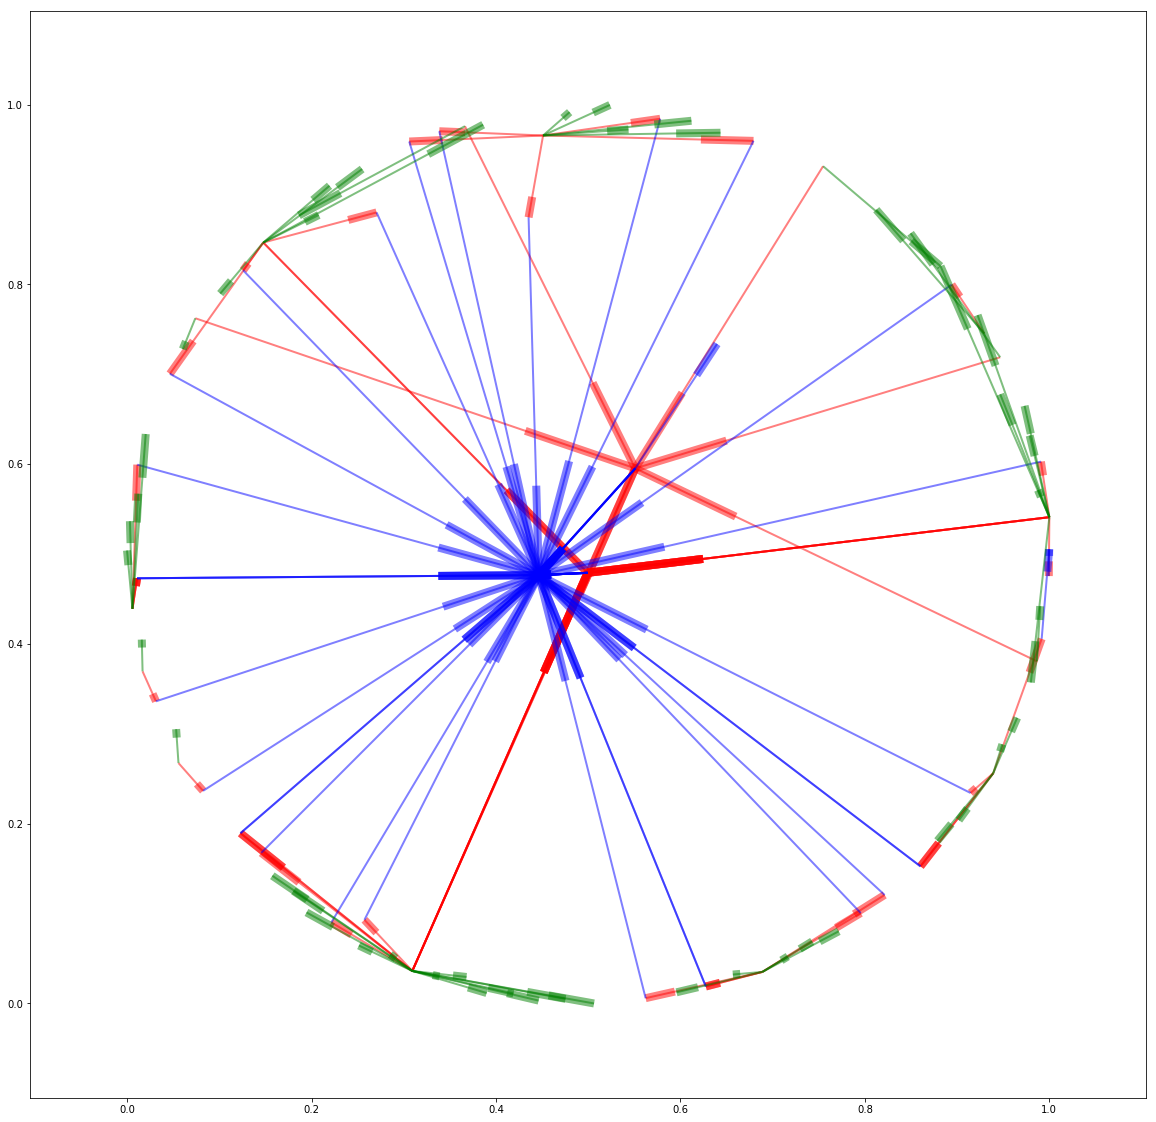

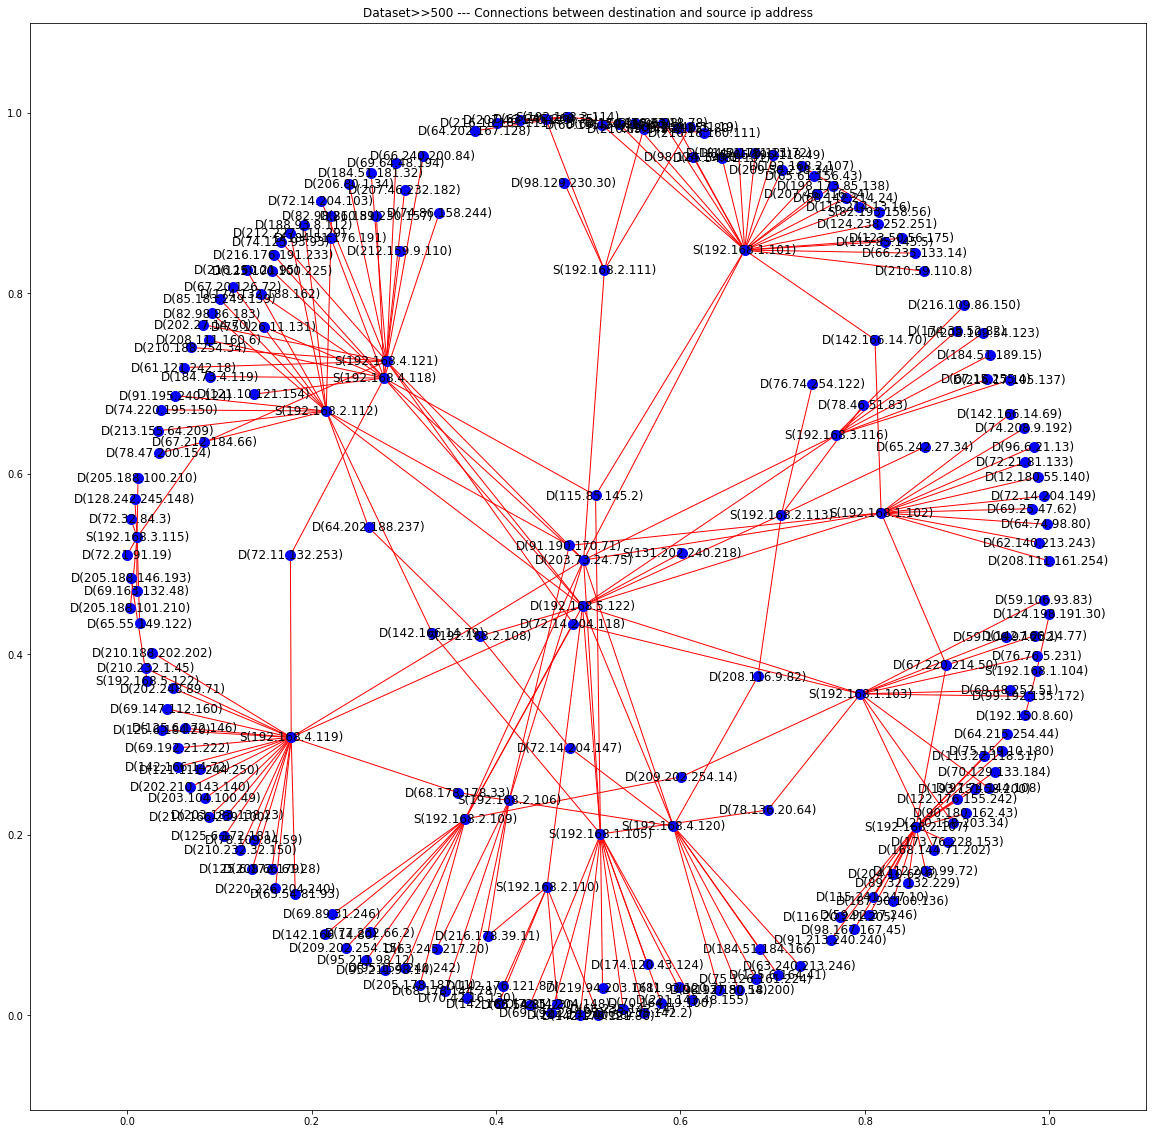

In [88]:
import networkx as nx
import pylab as plt
plt.figure(figsize=(20,20))
h = nx.Graph(source_dict)
pos = nx.layout.fruchterman_reingold_layout(h)
nx.draw_networkx(h, pos,arrows=True,node_color='blue',edge_color='red',node_size=100)
plt.title("Dataset>>500 --- Connections between destination and source ip address")
plt.savefig("one.png")
plt.show(h)
#print h.edges()
plt.close()



### using port numbers 

###### S-SourceIP     D-DestIP      SP-SourcePort    DP-DestPort      

###### Dataset -- 500

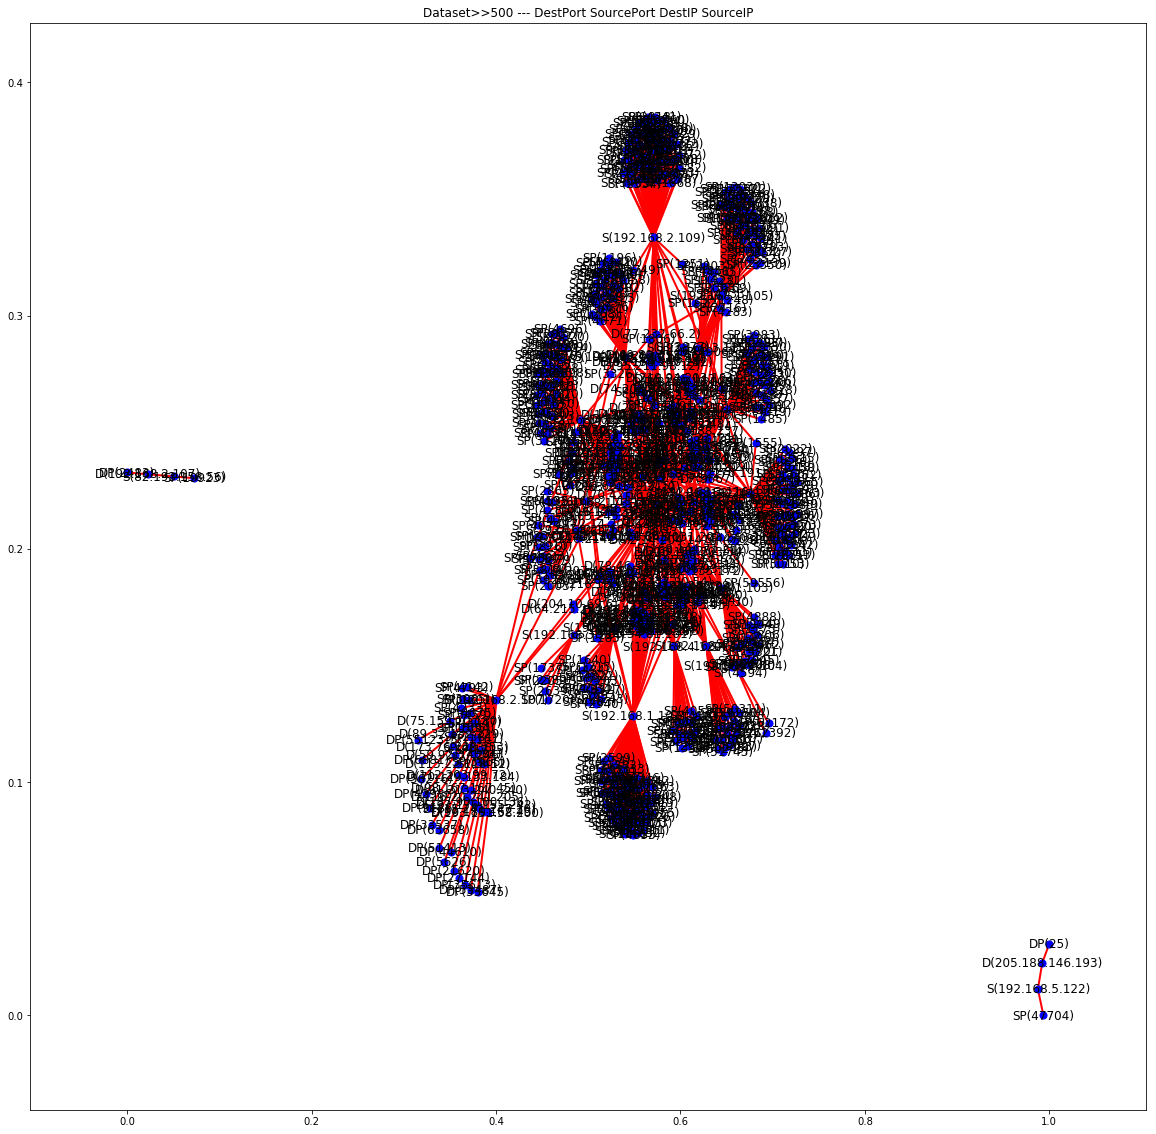

In [89]:
import networkx as nx
import pylab as plt
h = nx.Graph()
for ix in range(500):
    h.add_edge("S("+str(df_new['source'][ix])+")","D("+str(df_new['destination'][ix])+")",width =2)
    h.add_edge("D("+str(df_new['destination'][ix])+")" ,"DP("+str(df_new['destinationPort'][ix])+")",width=2)
    h.add_edge("S("+str(df_new['source'][ix])+")" ,"SP("+str(df_new['sourcePort'][ix])+")",width=400)

plt.figure(figsize=(20,20))
pos = nx.layout.fruchterman_reingold_layout(h)
#nx.draw_networkx(h, pos)
nx.draw_networkx(h, pos,arrows=True,node_color='blue',edge_color='red',node_size=50,width=2)
plt.title("Dataset>>500 --- DestPort SourcePort DestIP SourceIP")
plt.savefig("two.png")
plt.show(h)

###### dataset - 100

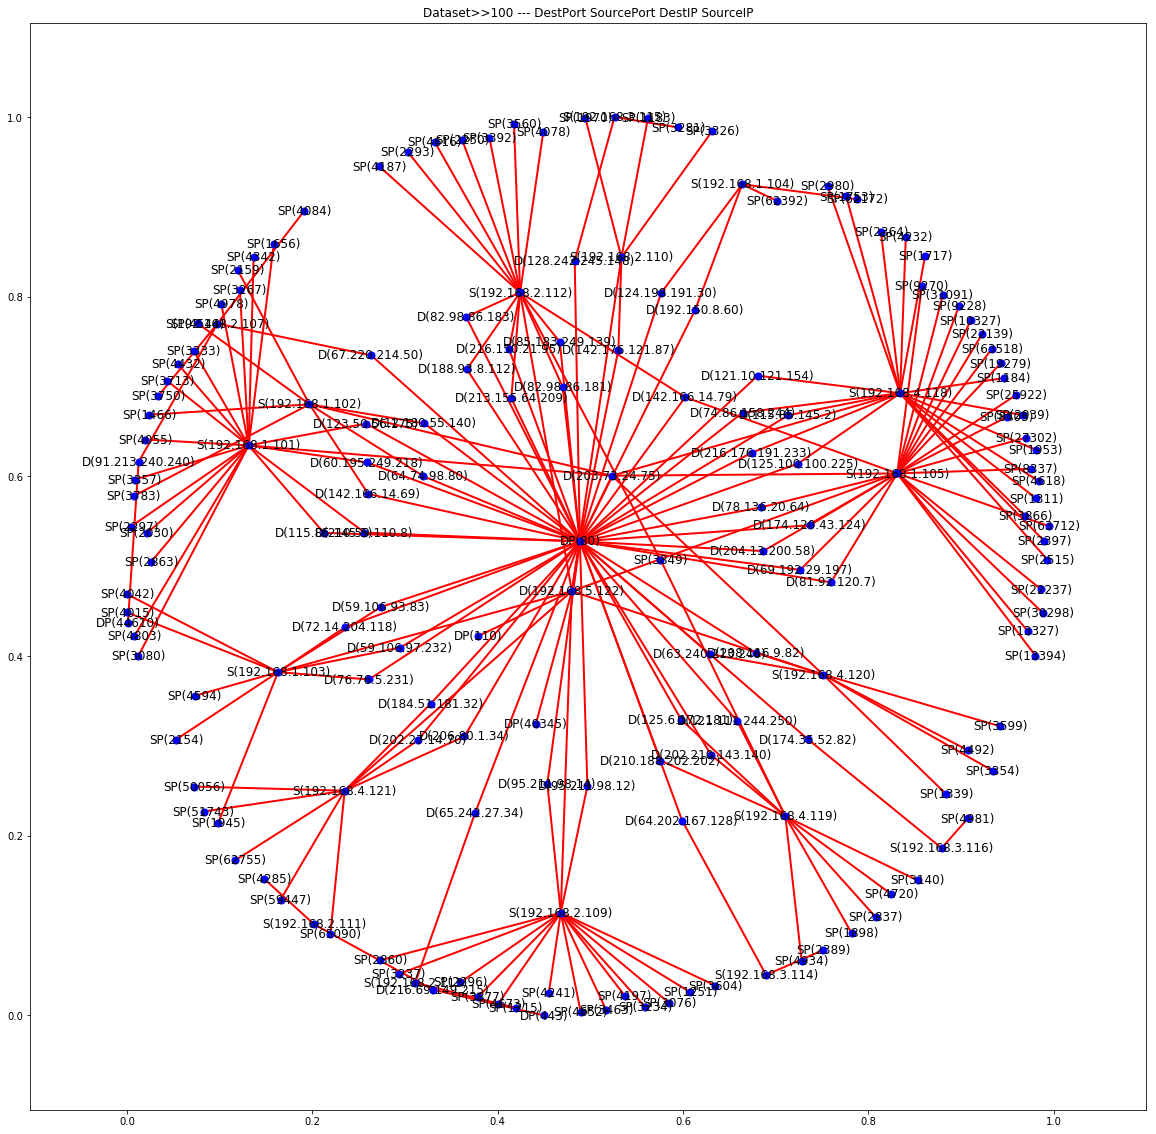

In [90]:
import networkx as nx
import pylab as plt
h = nx.Graph()
for ix in range(100):
    h.add_edge("S("+str(df_new['source'][ix])+")","D("+str(df_new['destination'][ix])+")",width =2)
    h.add_edge("D("+str(df_new['destination'][ix])+")" ,"DP("+str(df_new['destinationPort'][ix])+")",width=2)
    h.add_edge("S("+str(df_new['source'][ix])+")" ,"SP("+str(df_new['sourcePort'][ix])+")",width=400)

plt.figure(figsize=(20,20))
pos = nx.layout.fruchterman_reingold_layout(h)
#nx.draw_networkx(h, pos)
nx.draw_networkx(h, pos,arrows=True,node_color='blue',edge_color='red',node_size=50,width=2)
plt.title("Dataset>>100 --- DestPort SourcePort DestIP SourceIP")
plt.savefig("three.png")
plt.show(h)

### Digraph

######  creating color tuple

In [91]:
import networkx as nx
import pylab as plt
h = nx.DiGraph()
i = nx.DiGraph()
j = nx.DiGraph()

l1 = []
l2 = []
l3 = []
for ix in range(50):
    h.add_edge("S("+str(df_new['source'][ix])+")","D("+str(df_new['destination'][ix])+")")
    l1.append(("S("+str(df_new['source'][ix])+")","D("+str(df_new['destination'][ix])+")"))
    
    h.add_edge("D("+str(df_new['destination'][ix])+")" ,"DP("+str(df_new['destinationPort'][ix])+")")
    l2.append(("D("+str(df_new['destination'][ix])+")" ,"DP("+str(df_new['destinationPort'][ix])+")"))
    
    h.add_edge("S("+str(df_new['source'][ix])+")" ,"SP("+str(df_new['sourcePort'][ix])+")")
    l3.append(("S("+str(df_new['source'][ix])+")" ,"SP("+str(df_new['sourcePort'][ix])+")"))

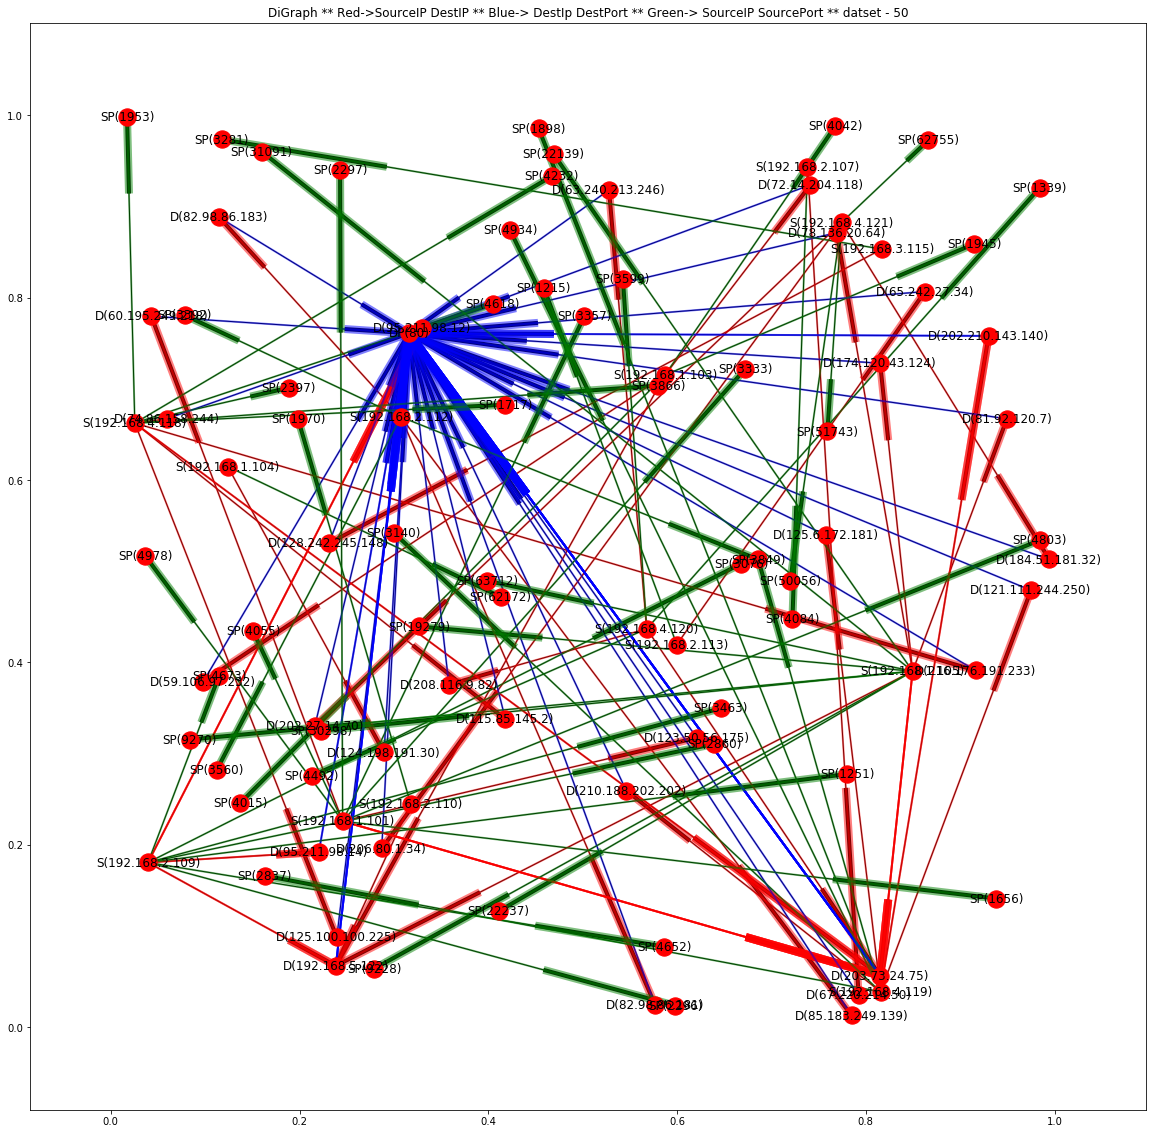

In [92]:
plt.close()
plt.figure(figsize=(20,20))
pos = nx.layout.random_layout(h)
#nx.draw_networkx(h, pos)
nx.draw_networkx(h,pos)
nx.draw_networkx_edges(h, pos, edgelist=l1, width=2, alpha=0.5, edge_color='r')
nx.draw_networkx_edges(h, pos, edgelist=l2, width=2, alpha=0.5, edge_color='b')
nx.draw_networkx_edges(h, pos, edgelist=l3, width=2, alpha=0.5, edge_color='g')
plt.title("DiGraph ** Red->SourceIP DestIP ** Blue-> DestIp DestPort ** Green-> SourceIP SourcePort ** datset - 50")
plt.savefig("four.png")
plt.show(h)
plt.close()

###### writing weights

In [93]:
plt.close()
import networkx as nx
import pylab as plt
plt.figure(figsize=(20,20))
pos = nx.layout.fruchterman_reingold_layout(h)
#nx.draw_networkx(h, pos)
#nx.draw_networkx(h,pos)
nx.draw_networkx_edges(h, pos, edgelist=l1, width=2, alpha=0.5, edge_color='r')
nx.draw_networkx_edges(h, pos, edgelist=l2, width=2, alpha=0.5, edge_color='b')
nx.draw_networkx_edges(h, pos, edgelist=l3, width=2, alpha=0.5, edge_color='g')

d = {}
c = 0
for ix in edge_labels:
    d[ix] = df_new['protocolName'][c]
    c+=1
nx.draw_networkx_edge_labels(h, pos, edge_labels = d)
nx.draw_networkx(h, pos,arrows=True,node_color='blue',node_size=100)
plt.title("DiGraph ** Red->SourceIP DestIP ** Blue-> DestIp DestPort ** Green-> SourceIP SourcePort ** datset - 50")
plt.savefig("five.png")
plt.show(h)
plt.close()

NameError: name 'edge_labels' is not defined

###### checking for syn

In [94]:
df_new['protocolName'].value_counts()

tcp_ip          421850
protocolName         2
Name: protocolName, dtype: int64

In [95]:
df_new = df_new[df_new.protocolName != 'protocolName']

In [96]:
df_new['protocolName'].value_counts()

tcp_ip    421850
Name: protocolName, dtype: int64

In [97]:
df_new = df_new.reset_index(drop=True)

In [113]:
import datetime
dest = []
prev_ind = 0
source = []
destPort = []
sourcePort = []
new_list = []
dest_list = []

for i in range(len(df_new)):
    #stop_time = datetime.datetime.strptime(df_new['startDateTime'][i][-5:],'%M:%S')
    stop_time = df_new['startDateTime'][i][-2:]
    l = list(df_new['sourceTCPFlagsDescription'][i])
    if 'S' in l and 'A' not in l and len(l) > 0:
        if df_new['destination'][i] in dest:
#             if prev_dest is not None:
#                 prev_ind = dest.index(df_new['destination'][i],prev_ind)
            prev_ind = len(dest) - 1 - dest[::-1].index(df_new['destination'][i])
            #print prev_ind
            prev_dest = df_new['destination'][prev_ind]
            #start_time  = datetime.datetime.strptime(df_new['stopDateTime'][prev_ind][-5:],'%M:%S')
            start_time = df_new['stopDateTime'][prev_ind][-2:]
            #diff_time = stop_time.second - start_time.second
            diff_time = int(stop_time) - int(start_time)
            #print diff_time
            if diff_time<10 and diff_time>0:
                
                #print(df_new['source'][i])
                new_list = df_new['source'][i]
                print(new_list)
               
                print(df_new['destination'][i])
                
                print(df_new['sourcePort'][i])
               
                print(df_new['destinationPort'][i])
               
                print(df_new['appName'][i])
                
                
               
                #dest_list = df_new['destination'][i]
    
                #print(df_new['destination'][i])
                #print(dest_list)
                #print i, j        
                
                #print df_new['Tag'][i]
    
        dest.append(df_new['destination'][i])

print ("done")      
#print dest

192.168.2.107
a
41.204.175.98
b
4951
c
52285
d
Unknown_TCP
bye
192.168.2.107
a
99.65.16.196
b
1587
c
50000
d
Unknown_TCP
bye
192.168.2.107
a
123.98.173.230
b
4001
c
51413
d
Unknown_TCP
bye
192.168.2.107
a
122.162.76.205
b
4918
c
27144
d
Unknown_TCP
bye
192.168.2.107
a
60.51.69.29
b
4302
c
51333
d
Unknown_TCP
bye
192.168.2.107
a
95.79.73.123
b
4035
c
55785
d
Unknown_TCP
bye
192.168.2.107
a
96.56.113.234
b
2314
c
33077
d
Flowgen
bye
192.168.2.107
a
92.62.62.48
b
4412
c
23296
d
Unknown_TCP
bye
192.168.2.107
a
78.111.176.14
b
3271
c
10340
d
Unknown_TCP
bye
192.168.2.107
a
190.41.111.126
b
2018
c
28703
d
Unknown_TCP
bye
192.168.2.107
a
41.205.4.247
b
1904
c
47191
d
Unknown_TCP
bye
192.168.2.107
a
91.82.178.19
b
2750
c
51413
d
Unknown_TCP
bye
192.168.2.107
a
173.230.156.78
b
3797
c
44554
d
Unknown_TCP
bye
192.168.2.107
a
77.77.81.74
b
2541
c
46393
d
Unknown_TCP
bye
192.168.2.107
a
189.21.44.249
b
2289
c
16031
d
Unknown_TCP
bye
192.168.2.107
a
99.58.244.128
b
1865
c
42665
d
Unknown_TCP
bye
19

192.168.2.107
a
122.144.111.104
b
3660
c
39908
d
Unknown_TCP
bye
192.168.2.107
a
189.80.34.8
b
2522
c
42574
d
Unknown_TCP
bye
192.168.2.107
a
212.92.244.125
b
2765
c
61645
d
Unknown_TCP
bye
192.168.2.107
a
98.167.167.45
b
3412
c
51413
d
Unknown_TCP
bye
192.168.2.107
a
123.238.241.195
b
4433
c
11008
d
Unknown_TCP
bye
192.168.2.107
a
178.64.102.147
b
1357
c
31878
d
Unknown_TCP
bye
192.168.2.107
a
41.205.4.247
b
4317
c
47191
d
Unknown_TCP
bye
192.168.2.107
a
92.255.107.74
b
2241
c
21600
d
Unknown_TCP
bye
192.168.2.107
a
187.58.105.131
b
2259
c
40141
d
Unknown_TCP
bye
192.168.2.107
a
86.122.193.68
b
3598
c
49043
d
Unknown_TCP
bye
192.168.2.107
a
195.34.94.1
b
1449
c
38388
d
Unknown_TCP
bye
192.168.2.107
a
180.73.132.220
b
4113
c
21943
d
Unknown_TCP
bye
192.168.2.107
a
187.13.129.70
b
3878
c
31637
d
Unknown_TCP
bye
192.168.2.107
a
95.25.142.59
b
3446
c
6882
d
Unknown_TCP
bye
192.168.2.107
a
80.255.50.53
b
3265
c
45454
d
Unknown_TCP
bye
192.168.2.107
a
189.12.115.5
b
4424
c
41222
d
Unknown_T

192.168.2.107
a
99.184.98.195
b
4595
c
42665
d
Unknown_TCP
bye
192.168.2.107
a
41.72.116.10
b
1791
c
24796
d
Unknown_TCP
bye
192.168.2.107
a
89.10.30.155
b
3094
c
50000
d
Unknown_TCP
bye
192.168.2.107
a
189.74.169.55
b
1577
c
31522
d
Unknown_TCP
bye
192.168.2.107
a
91.82.178.19
b
2750
c
51413
d
Unknown_TCP
bye
192.168.2.107
a
189.127.168.29
b
3468
c
63699
d
Unknown_TCP
bye
192.168.2.107
a
86.122.193.68
b
3355
c
49043
d
Unknown_TCP
bye
192.168.2.107
a
187.58.152.198
b
1437
c
29739
d
Unknown_TCP
bye
192.168.2.107
a
187.58.15.36
b
2918
c
29897
d
Unknown_TCP
bye
192.168.2.107
a
93.174.56.249
b
3591
c
16632
d
Unknown_TCP
bye
192.168.2.107
a
121.52.145.138
b
1551
c
26558
d
Unknown_TCP
bye
192.168.2.107
a
117.90.18.46
b
4775
c
12343
d
Unknown_TCP
bye
192.168.2.107
a
91.201.3.120
b
2424
c
21995
d
Unknown_TCP
bye
192.168.2.107
a
194.242.103.132
b
1373
c
22112
d
Unknown_TCP
bye
192.168.2.107
a
178.66.46.22
b
1605
c
62192
d
Unknown_TCP
bye
192.168.2.107
a
60.52.37.94
b
2300
c
51333
d
Unknown_TCP


192.168.2.107
a
91.82.178.19
b
2686
c
51413
d
Unknown_TCP
bye
192.168.2.107
a
203.177.74.140
b
1092
c
44414
d
Unknown_TCP
bye
192.168.2.107
a
195.34.94.1
b
4472
c
38388
d
Unknown_TCP
bye
192.168.2.107
a
125.212.35.34
b
2930
c
49373
d
Unknown_TCP
bye
192.168.2.107
a
187.45.81.194
b
4817
c
48761
d
Unknown_TCP
bye
192.168.1.103
a
209.202.254.15
b
1895
c
80
d
HTTPWeb
bye
192.168.2.107
a
122.169.156.120
b
4972
c
51787
d
Unknown_TCP
bye
192.168.2.107
a
173.230.156.78
b
3354
c
44554
d
Unknown_TCP
bye
192.168.2.107
a
110.159.119.148
b
2215
c
57005
d
Unknown_TCP
bye
192.168.2.107
a
80.247.45.106
b
3829
c
62980
d
Unknown_TCP
bye
192.168.2.107
a
82.152.195.142
b
3746
c
16868
d
Unknown_TCP
bye
192.168.2.107
a
41.205.4.247
b
3332
c
47191
d
Unknown_TCP
bye
192.168.2.107
a
122.144.111.104
b
3226
c
39908
d
Unknown_TCP
bye
192.168.2.107
a
122.162.76.205
b
4715
c
27144
d
Unknown_TCP
bye
192.168.2.107
a
180.180.8.142
b
1492
c
37289
d
Unknown_TCP
bye
192.168.2.107
a
41.131.108.252
b
4296
c
54203
d
Unknown

80
d
HTTPImageTransfer
bye
192.168.2.107
a
122.89.80.91
b
4913
c
51413
d
Unknown_TCP
bye
192.168.2.107
a
90.149.104.197
b
4258
c
20364
d
Unknown_TCP
bye
192.168.2.107
a
122.160.72.230
b
2114
c
28534
d
Unknown_TCP
bye
192.168.2.107
a
131.130.93.4
b
4681
c
51413
d
Unknown_TCP
bye
192.168.2.107
a
122.167.43.11
b
1700
c
35871
d
Unknown_TCP
bye
192.168.2.107
a
93.124.8.166
b
2740
c
50866
d
Unknown_TCP
bye
192.168.2.107
a
98.167.167.45
b
1038
c
51413
d
Unknown_TCP
bye
192.168.2.107
a
115.117.236.203
b
4693
c
39418
d
Unknown_TCP
bye
192.168.2.107
a
122.252.246.234
b
2328
c
4041
d
Unknown_TCP
bye
192.168.2.107
a
189.105.90.6
b
2157
c
47985
d
Unknown_TCP
bye
192.168.2.107
a
99.61.77.6
b
2795
c
40905
d
Unknown_TCP
bye
192.168.2.107
a
189.127.146.70
b
3998
c
47729
d
Unknown_TCP
bye
192.168.2.107
a
189.105.90.6
b
3968
c
47985
d
Unknown_TCP
bye
192.168.2.107
a
93.65.15.116
b
4182
c
6881
d
BitTorrent
bye
192.168.2.107
a
189.12.115.5
b
1033
c
41222
d
Unknown_TCP
bye
192.168.2.107
a
189.12.115.5
b
151

192.168.2.107
a
178.66.46.22
b
1605
c
62192
d
Unknown_TCP
bye
192.168.2.107
a
91.82.178.19
b
2932
c
51413
d
Unknown_TCP
bye
192.168.2.107
a
41.205.4.247
b
4393
c
47191
d
Unknown_TCP
bye
192.168.2.107
a
90.149.104.197
b
1850
c
20364
d
Unknown_TCP
bye
192.168.2.107
a
122.252.246.234
b
2947
c
4041
d
Unknown_TCP
bye
192.168.2.107
a
41.210.250.253
b
4609
c
16755
d
Unknown_TCP
bye
192.168.2.107
a
190.76.16.114
b
3516
c
43867
d
Unknown_TCP
bye
192.168.2.107
a
188.216.14.18
b
3279
c
62514
d
Unknown_TCP
bye
192.168.2.107
a
94.241.5.193
b
1229
c
25469
d
Unknown_TCP
bye
192.168.4.118
a
203.73.24.75
b
2055
c
80
d
HTTPImageTransfer
bye
192.168.1.103
a
209.202.254.15
b
4512
c
80
d
HTTPWeb
bye
192.168.2.107
a
99.58.241.52
b
1267
c
42665
d
Unknown_TCP
bye
192.168.2.107
a
90.149.104.197
b
4936
c
20364
d
Unknown_TCP
bye
192.168.2.107
a
119.98.118.104
b
1741
c
8275
d
Unknown_TCP
bye
192.168.2.107
a
117.90.18.46
b
2260
c
12343
d
Unknown_TCP
bye
192.168.2.107
a
178.66.32.255
b
3096
c
52151
d
Unknown_TCP
by

192.168.4.119
a
125.6.184.20
b
1804
c
80
d
HTTPWeb
bye
192.168.2.107
a
190.42.8.191
b
1820
c
31550
d
Unknown_TCP
bye
192.168.2.107
a
216.99.100.79
b
2179
c
35801
d
Unknown_TCP
bye
192.168.2.107
a
89.10.30.155
b
4261
c
50000
d
Unknown_TCP
bye
192.168.2.107
a
82.85.234.145
b
1743
c
21117
d
Unknown_TCP
bye
192.168.2.107
a
122.144.12.43
b
2958
c
38647
d
Unknown_TCP
bye
192.168.2.107
a
178.66.32.255
b
3239
c
52151
d
Unknown_TCP
bye
192.168.2.107
a
151.16.99.200
b
1174
c
34625
d
Unknown_TCP
bye
192.168.2.107
a
95.57.76.220
b
2363
c
29814
d
Unknown_TCP
bye
192.168.2.107
a
188.216.14.18
b
1939
c
62514
d
Unknown_TCP
bye
192.168.2.107
a
70.129.133.184
b
1715
c
63658
d
Unknown_TCP
bye
192.168.2.107
a
188.128.13.118
b
2265
c
21909
d
Unknown_TCP
bye
192.168.2.107
a
151.16.99.200
b
1174
c
34625
d
Unknown_TCP
bye
192.168.2.107
a
188.187.44.25
b
2709
c
39102
d
Unknown_TCP
bye
192.168.2.107
a
60.52.37.94
b
2002
c
51333
d
Unknown_TCP
bye
192.168.2.107
a
118.100.163.243
b
2890
c
27710
d
Unknown_TCP
bye
1